# Disk Stars

In [1]:
from typing import Optional, Tuple
from astropy.io import fits
from astropy.table import Table, vstack
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
# Open the FITS files
# Define the pattern to match FITS files
pattern = '../Disk_Lomeli/*.fits'

# Use glob to find all FITS files in the current directory
fits_files = glob.glob(pattern)

print(fits_files)

['../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_1_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_8_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_4_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_7_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_2_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_6_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_5_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_3_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_9_disco.fits']


In [3]:
# Create an empty list to store individual tables
tables = []
    

In [4]:
# Loop through each FITS file and read it into a Table
for file in fits_files:
    with fits.open(file) as hdul:
        # Extract data from the FITS file
        data = hdul[1].data  # Assuming the data is in the first extension (HDU index 1)
        
        # Convert the data to a Table
        table = Table(data)
        
        # Append the Table to the list
        tables.append(table)

In [5]:
# Concatenate all Tables into a single Table
final_table_ = vstack(tables)
final_table_

<Table length=9297468>
NUMBER       ALPHA               DELTA            u         uerr        g          gerr         r      ...  ellog_r    ellip_r    class_r      spread_r    flux_radius_r area_r  mumax_r  kron_radius_r
int32       float64             float64        float64    float64    float64     float64     float64   ...  float64    float64    float64      float64        float64    int16   float64     float64   
------ ------------------ ------------------- --------- ----------- ---------- ------------ ---------- ... --------- ----------- ---------- -------------- ------------- ------ --------- -------------
     1 101.12644465695432 -10.612184907318111 14.702288 0.004686178  13.257763 0.0017844065  12.814565 ... 1.0917432  0.08403367  0.9959378   0.0035467616     1.5721868    360 13.946505           3.5
     2 101.22978673763829 -10.613081022602527  14.67916 0.004649523  13.313589 0.0018312561  12.953415 ... 1.0371287 0.035799503 0.99576354   0.0030613788     1.5621964    348  14.25836           3.5
     4 101.16174743658358  -10.61482234181521  17.98022  0.03374533  15.468643 0.0056189857   14.42472 ... 1.1065474 0.096288085   0.994979   0.0020252967     1.5394539    177 15.446119           3.5
     6 101.13987401313562 -10.614493027260734  18.20657  0.03976299  16.403088  0.009685606   16.11784 ... 1.0391213  0.03764844  0.9856163   0.0019874868      1.487598     82 17.151478           3.5
    18 101.48501334068615  -10.61194226048895 16.787233 0.015462027 14.9619255 0.0042368323  14.546155 ...  1.019854 0.019467473 0.98350877   0.0010218968     1.5009149    141 15.741087           3.5
    19 101.24259368990718 -10.614471770489988      99.0        99.0  19.178055  0.072125085  18.242247 ... 1.0197631 0.019380093 0.98110706   0.0017732971      1.459666     29  19.34411           3.5
    22   101.133690933046  -10.61453930354514 20.720034  0.32007983  18.704372  0.049083427   18.05302 ... 1.0781343  0.07247174 0.98750556     0.00233761     1.4837223     29   19.2319           3.5
    26 101.48208672753326 -10.606132785201316 14.339123 0.003916322  12.930256 0.0015177741 12.4319105 ... 1.0204905 0.020079076  0.9958677   0.0035497933     1.5502384    434 13.680695           3.5
   ...                ...                 ...       ...         ...        ...          ...        ... ...       ...         ...        ...            ...           ...    ...       ...           ...
154207 131.41661925927176  -58.65174809377939 19.274117  0.07246043  17.136738  0.011983902  16.317144 ...  1.039943 0.038408875  0.9869119 -8.9874935e-05     1.6440543     84 17.685196           3.5
154214 131.76055588535746  -58.67178342765507      99.0        99.0  20.041819   0.14005944  19.190601 ... 1.0605439  0.05708754 0.94155157  -0.0012028569     1.4752662     21 20.445192           3.5
154217 133.78232558624563  -58.67359750686801  19.13808  0.06401829  17.292562  0.013311605   16.58529 ... 1.0705211  0.06587547   0.975363  0.00012568163     1.7014754     68 18.067163           3.5
154221 133.28021718646767  -58.63125910365725      99.0        99.0   20.56387   0.23095371  19.389965 ... 1.0641513  0.06028402  0.5945047   0.0015202739      1.483324     20 20.928373           3.5
154224  133.1811790685612 -58.680841156452956 20.869568   0.3055923  19.780874    0.1100665  18.829443 ... 1.1361729 0.119852304  0.9185118  0.00092918146     1.6282876     29 20.307621           3.5
154225  132.5514264280212   -58.6803192843011 20.671007  0.25750637  19.605003   0.09347016  19.059345 ... 1.0495205  0.04718399  0.9403246   0.0011704119     1.6602832     25  20.44012           3.5
154230 133.88788552302333  -58.67729991483857      99.0        99.0  19.738342   0.10506029  18.874659 ... 1.0588628  0.05559063  0.7758389    0.000533249     1.6436368     29 20.255592           3.5
154231  133.8841471077617  -58.66888231352096 20.904305  0.29977491  19.203485  0.065347135  18.368792 ... 1.1205535  0.10758388 0.86370087    0.002344491     1.6877979     32  

In [6]:
# Define conditions for filtering the table
mask_fields = (final_table_["field"] == "d049") | \
              (final_table_["field"] == "d203") | \
              (final_table_["field"] == "d218") | \
              (final_table_["field"] == "d243") | \
              (final_table_["field"] == "d262")

final_table = final_table_[~mask_fields]


### Cleaning

In [7]:
final_table.colnames


['NUMBER',
 'ALPHA',
 'DELTA',
 'u',
 'uerr',
 'g',
 'gerr',
 'r',
 'rerr',
 'i',
 'ierr',
 'z',
 'zerr',
 'F378',
 'F378err',
 'F395',
 'F395err',
 'F410',
 'F410err',
 'F430',
 'F430err',
 'F515',
 'F515err',
 'F660',
 'F660err',
 'F861',
 'F861err',
 'flags_i',
 'fwhm_i',
 'fwhm_psf_i',
 'ellog_i',
 'ellip_i',
 'class_i',
 'spread_i',
 'flux_radius_i',
 'area_i',
 'mumax_i',
 'mag_aper2_i',
 'magerr_apper2_i',
 'mag_aper4_i',
 'magerr_apper4_i',
 'mag_aper6_i',
 'magerr_apper6_i',
 'flux_aper6_u',
 'fluxerr_aper6_u',
 'flux_aper6_g',
 'fluxerr_aper6_g',
 'flux_aper6_r',
 'fluxerr_aper6_r',
 'flux_aper6_i',
 'fluxerr_aper6_i',
 'flux_aper6_z',
 'fluxerr_aper6_z',
 'flux_aper6_F378',
 'fluxerr_aper6_F378',
 'flux_aper6_F395',
 'fluxerr_aper6_F395',
 'flux_aper6_F410',
 'fluxerr_aper6_F410',
 'flux_aper6_F430',
 'fluxerr_aper6_F430',
 'flux_aper6_F515',
 'fluxerr_aper6_F515',
 'flux_aper6_F660',
 'fluxerr_aper6_F660',
 'flux_aper6_F861',
 'fluxerr_aper6_F861',
 'x',
 'y',
 'field',
 'a

In [8]:
# Masking, usar FLATS menor que 4
# Masking
# Define SNR threshold
snr_threshold = 5

# Calculate SNR for each band
snr_r = final_table["r"] / final_table["rerr"]
snr_F660 = final_table["F660"] / final_table["F660err"]
snr_i = final_table["i"] / final_table["ierr"]

# Masking for SNR
m_snr = (snr_r >= snr_threshold) & (snr_F660 >= snr_threshold) & (snr_i >= snr_threshold)

m_x =  (final_table["r"] >= 13) & (final_table["r"] <= 19.5) &\
       (final_table["F660"] <= 19.4) & (final_table["i"] <= 19.2) 

m_err = (final_table["rerr"] <= 0.2) & \
        (final_table["F660err"] <= 0.2) & \
        (final_table["ierr"] <= 0.2)


#m_sn = (tab["s2n_r_PStotal"] >= 10) & \
#       (tab["s2n_J0660_PStotal"] >= 10) & \
#        (tab["s2n_i_PStotal"] >= 10)

m_ell = (final_table["ellip_r"] <= 0.2) & (final_table["ellip_i"] <= 0.2)

m_50 = (final_table["flux_radius_r"] <= 3) & (final_table["flux_radius_i"] <= 3)

flags = (final_table["flags_r"] == 0) & (final_table["flags_i"] == 0)

class_star = (final_table["class_r"] > 0.5) & (final_table["class_i"] > 0.5)


mask = m_snr & m_x & m_err & m_ell & m_50 & flags & class_star # Use fwhm_mask instead of valid_fwhm_range
tab_clean = final_table[mask]


In [9]:
#7352124

In [10]:
tab_clean

<Table length=7352124>
NUMBER       ALPHA               DELTA            u        uerr        g         gerr         r         rerr     ...  ellog_r    ellip_r    class_r      spread_r    flux_radius_r area_r  mumax_r  kron_radius_r
int32       float64             float64        float64   float64    float64    float64     float64    float64    ...  float64    float64    float64      float64        float64    int16   float64     float64   
------ ------------------ ------------------- --------- ---------- --------- ------------ --------- ------------ ... --------- ----------- ---------- -------------- ------------- ------ --------- -------------
     4 101.16174743658358  -10.61482234181521  17.98022 0.03374533 15.468643 0.0056189857  14.42472 0.0026955763 ... 1.1065474 0.096288085   0.994979   0.0020252967     1.5394539    177 15.446119           3.5
     6 101.13987401313562 -10.614493027260734  18.20657 0.03976299 16.403088  0.009685606  16.11784 0.0065813493 ... 1.0391213  0.03764844  0.9856163   0.0019874868      1.487598     82 17.151478           3.5
    19 101.24259368990718 -10.614471770489988      99.0       99.0 19.178055  0.072125085 18.242247  0.025254276 ... 1.0197631 0.019380093 0.98110706   0.0017732971      1.459666     29  19.34411           3.5
    22   101.133690933046  -10.61453930354514 20.720034 0.32007983 18.704372  0.049083427  18.05302  0.021954512 ... 1.0781343  0.07247174 0.98750556     0.00233761     1.4837223     29   19.2319           3.5
    27 101.23395094345061 -10.614958421917468 20.618263 0.30033928 19.505587  0.094769895   18.7646  0.037212428 ... 1.0662699 0.062151134    0.96337   -0.003152931     1.3776675     22 19.847305           3.5
    29 101.45020396757316 -10.613563336103292      99.0       99.0 17.519413  0.020020362 16.427586   0.00791204 ... 1.0472449 0.045113504  0.9843541  0.00052583555     1.4685931     69 17.556313           3.5
    30 101.18103695081625  -10.61414814675913 20.290388  0.2205315 18.805912   0.05328706  18.15263   0.02371279 ... 1.1294415  0.11460662 0.97812253  0.00020440489     1.3811588     28  19.17559           3.5
    32 101.25957515519961 -10.615015989092523      99.0       99.0 19.779247   0.12155715  19.46749   0.06469273 ... 1.2040911  0.16949809   0.822682   0.0025893813     1.5361756     15  20.62055           3.5
   ...                ...                 ...       ...        ...       ...          ...       ...          ... ...       ...         ...        ...            ...           ...    ...       ...           ...
154202 133.77478900619136  -58.63341552771152 20.300983 0.17696644  18.88126   0.04928596 18.148266  0.018739004 ... 1.0910027  0.08341199 0.98150265  -0.0009226093     1.6987203     39   19.5748           3.5
154207 131.41661925927176  -58.65174809377939 19.274117 0.07246043 17.136738  0.011983902 16.317144 0.0051365616 ...  1.039943 0.038408875  0.9869119 -8.9874935e-05     1.6440543     84 17.685196           3.5
154214 131.76055588535746  -58.67178342765507      99.0       99.0 20.041819   0.14005944 19.190601  0.043627895 ... 1.0605439  0.05708754 0.94155157  -0.0012028569     1.4752662     21 20.445192           3.5
154221 133.28021718646767  -58.63125910365725      99.0       99.0  20.56387   0.23095371 19.389965  0.052419342 ... 1.0641513  0.06028402  0.5945047   0.0015202739      1.483324     20 20.928373           3.5
154224  133.1811790685612 -58.680841156452956 20.869568  0.3055923 19.780874    0.1100665 18.829443   0.03233932 ... 1.1361729 0.119852304  0.9185118  0.00092918146     1.6282876     29 20.307621           3.5
154225  132.5514264280212   -58.6803192843011 20.671007 0.25750637 19.605003   0.09347016 19.059345   0.03889356 ... 1.0495205  0.04718399  0.9403246   0.0011704119     1.6602832     25  20.44012           3.5
154230 133.88788552302333  -58.67729991483857      99.0       99.0 19.738342   0.10506029 18.874659  0.033874873 ... 1.0588628  0.05559063  0.7758389    0.000533249     1.6436368     29 20.255592  

In [11]:
ri = tab_clean["r"] - tab_clean["i"]
rj660 = tab_clean["r"] - tab_clean["F660"]

In [12]:
def equation(m, c, x):
    # Define your equation here, for example, a linear equation: y = mx + c
    y = m * x + c
    return y

In [13]:
def plots(
    color1: np.ndarray,
    color2: np.ndarray,
    x_values: np.ndarray,
    y_values: np.ndarray,
    y_values1: Optional[np.ndarray] = None,
    sample_size: Optional[int] = None,
    xlim: Optional[Tuple[float, float]] = None,
    ylim: Optional[Tuple[float, float]] = None,
    density_method: str = "gaussian_kde",
    colormap: str = "viridis",
    label1: str = None,
    label2: str = None,
    label3: str = None,
    title: str = "Scatter Plot with Density Coloring"
) -> None:
    """
    Plots a scatter plot with points colored based on their density and one or two lines 
    defined by x_values, y_values, and optionally y_values1.
    """

    # Handle sampling and duplicate colors, ensuring equal lengths
    if sample_size is not None:
        unique_indices = np.random.choice(len(color1), size=sample_size, replace=False)
        color1, color2 = color1[unique_indices], color2[unique_indices]

    # Calculate density
    xy = np.vstack([color1, color2])
    if density_method == "gaussian_kde":
        density = gaussian_kde(xy)(xy)
    else:
        raise NotImplementedError(f"Density method {density_method} not supported.")

    # Sort points by density
    sorted_indices = density.argsort()[::-1]  # Descending order
    color1, color2, density = color1[sorted_indices], color2[sorted_indices], density[sorted_indices]

    # Create plot
    fig, ax = plt.subplots(figsize=(14, 11))

    # Customize scatter plot
    scatter_collection = ax.scatter(
        color1,
        color2,
        c=density,
        s=10,
        cmap=colormap,
        alpha=0.8,
        label=label1 if label1 else "Color 1"
    )

    # Customize colorbar
    plt.colorbar(scatter_collection, label="Density")

    # Customize line plots
    plt.plot(x_values, y_values, linewidth=2, color="red", label=label2 if label2 else "Line 1")
    if y_values1 is not None:
        plt.plot(x_values, y_values1, linewidth=2, color="blue", label=label3 if label3 else "Line 2")

    # Set limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Add labels and title
    plt.xlabel(label1 if label1 else "Color 1")
    plt.ylabel(label2 if label2 else "Color 2")
    plt.title(title)

    # Add legend if labels are provided
    if label1 or label2 or label3:
        plt.legend()

    plt.show()

In [14]:
# Generate x values
x_values = np.linspace(-10, 10, 100)  # Generate 100 x values from 0 to 10

# Compute y values using the equation
y_values = equation(0.35, -0.55, x_values)

In [15]:
y_values1 = equation(0.35, 0.45, x_values)

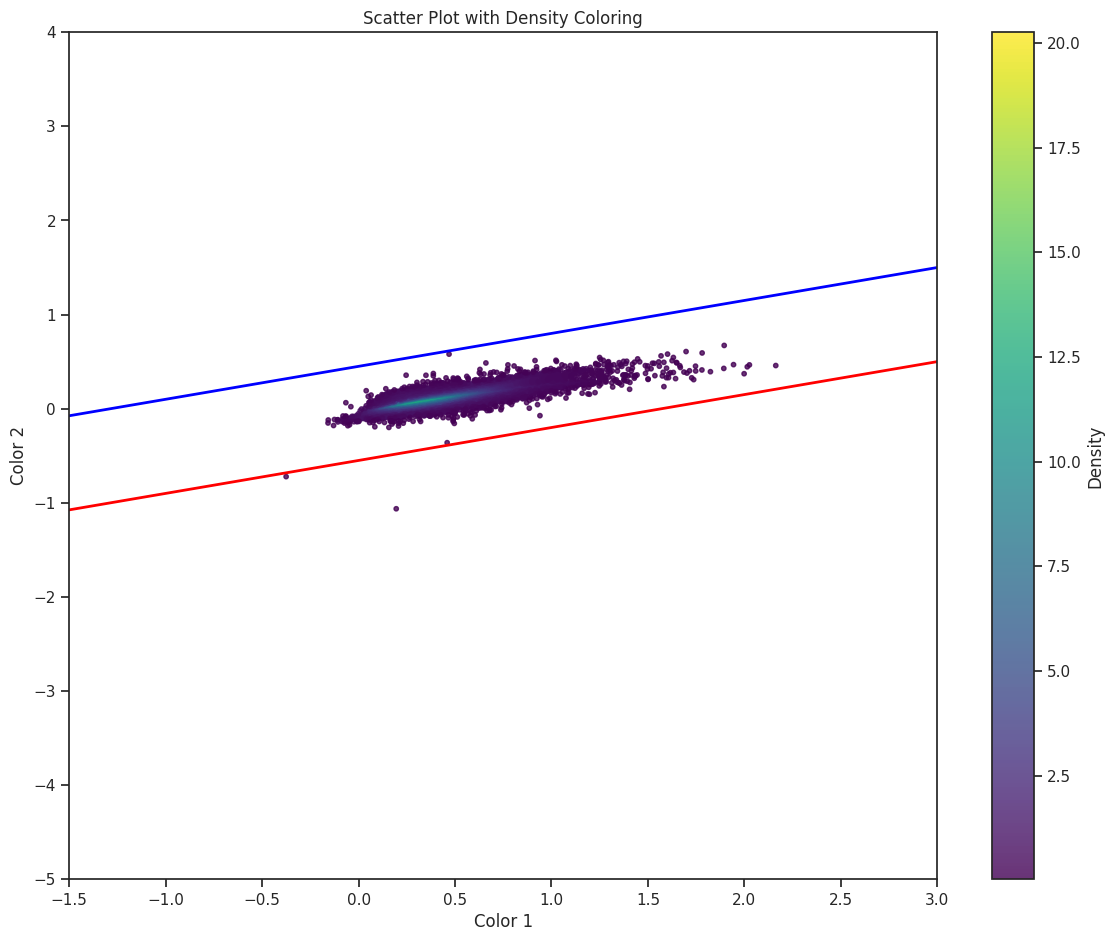

In [16]:
plots(ri, rj660, x_values, y_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4), sample_size=10000)

In [17]:
# Select objects below the line
# below_line = rj660 < equation(ri)
color_crit = (rj660  <= 0.35*ri - 0.55)

# upper_line = rj660 < equation(ri)
color_crit_upper = (rj660 >= 0.35*ri + 0.45)

In [18]:
tab_clean_below = tab_clean[color_crit]
len(tab_clean_below)

1641

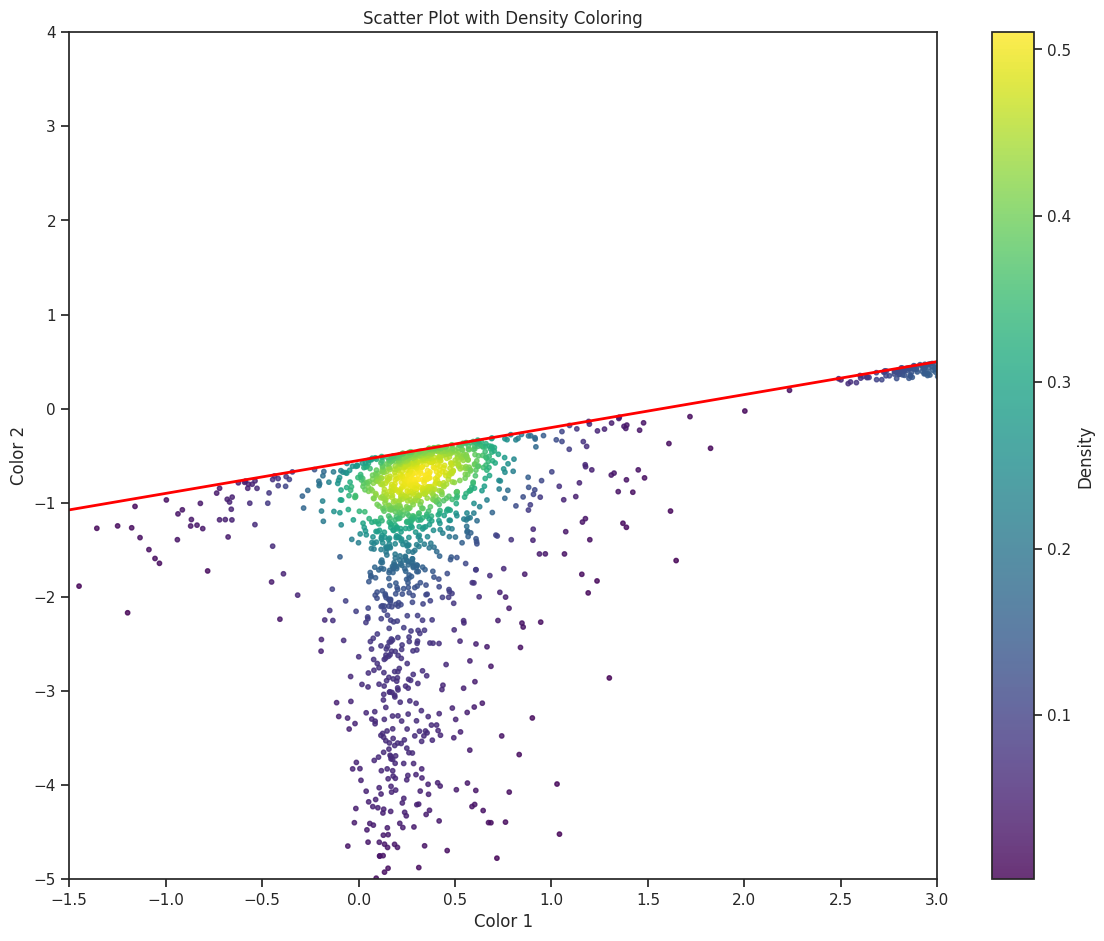

In [19]:
ri_below = tab_clean_below["r"] - tab_clean_below["i"]
rj660_below = tab_clean_below["r"] - tab_clean_below["F660"]



plots(ri_below, rj660_below, x_values, y_values, xlim=(-1.5, 3), ylim=(-5, 4))

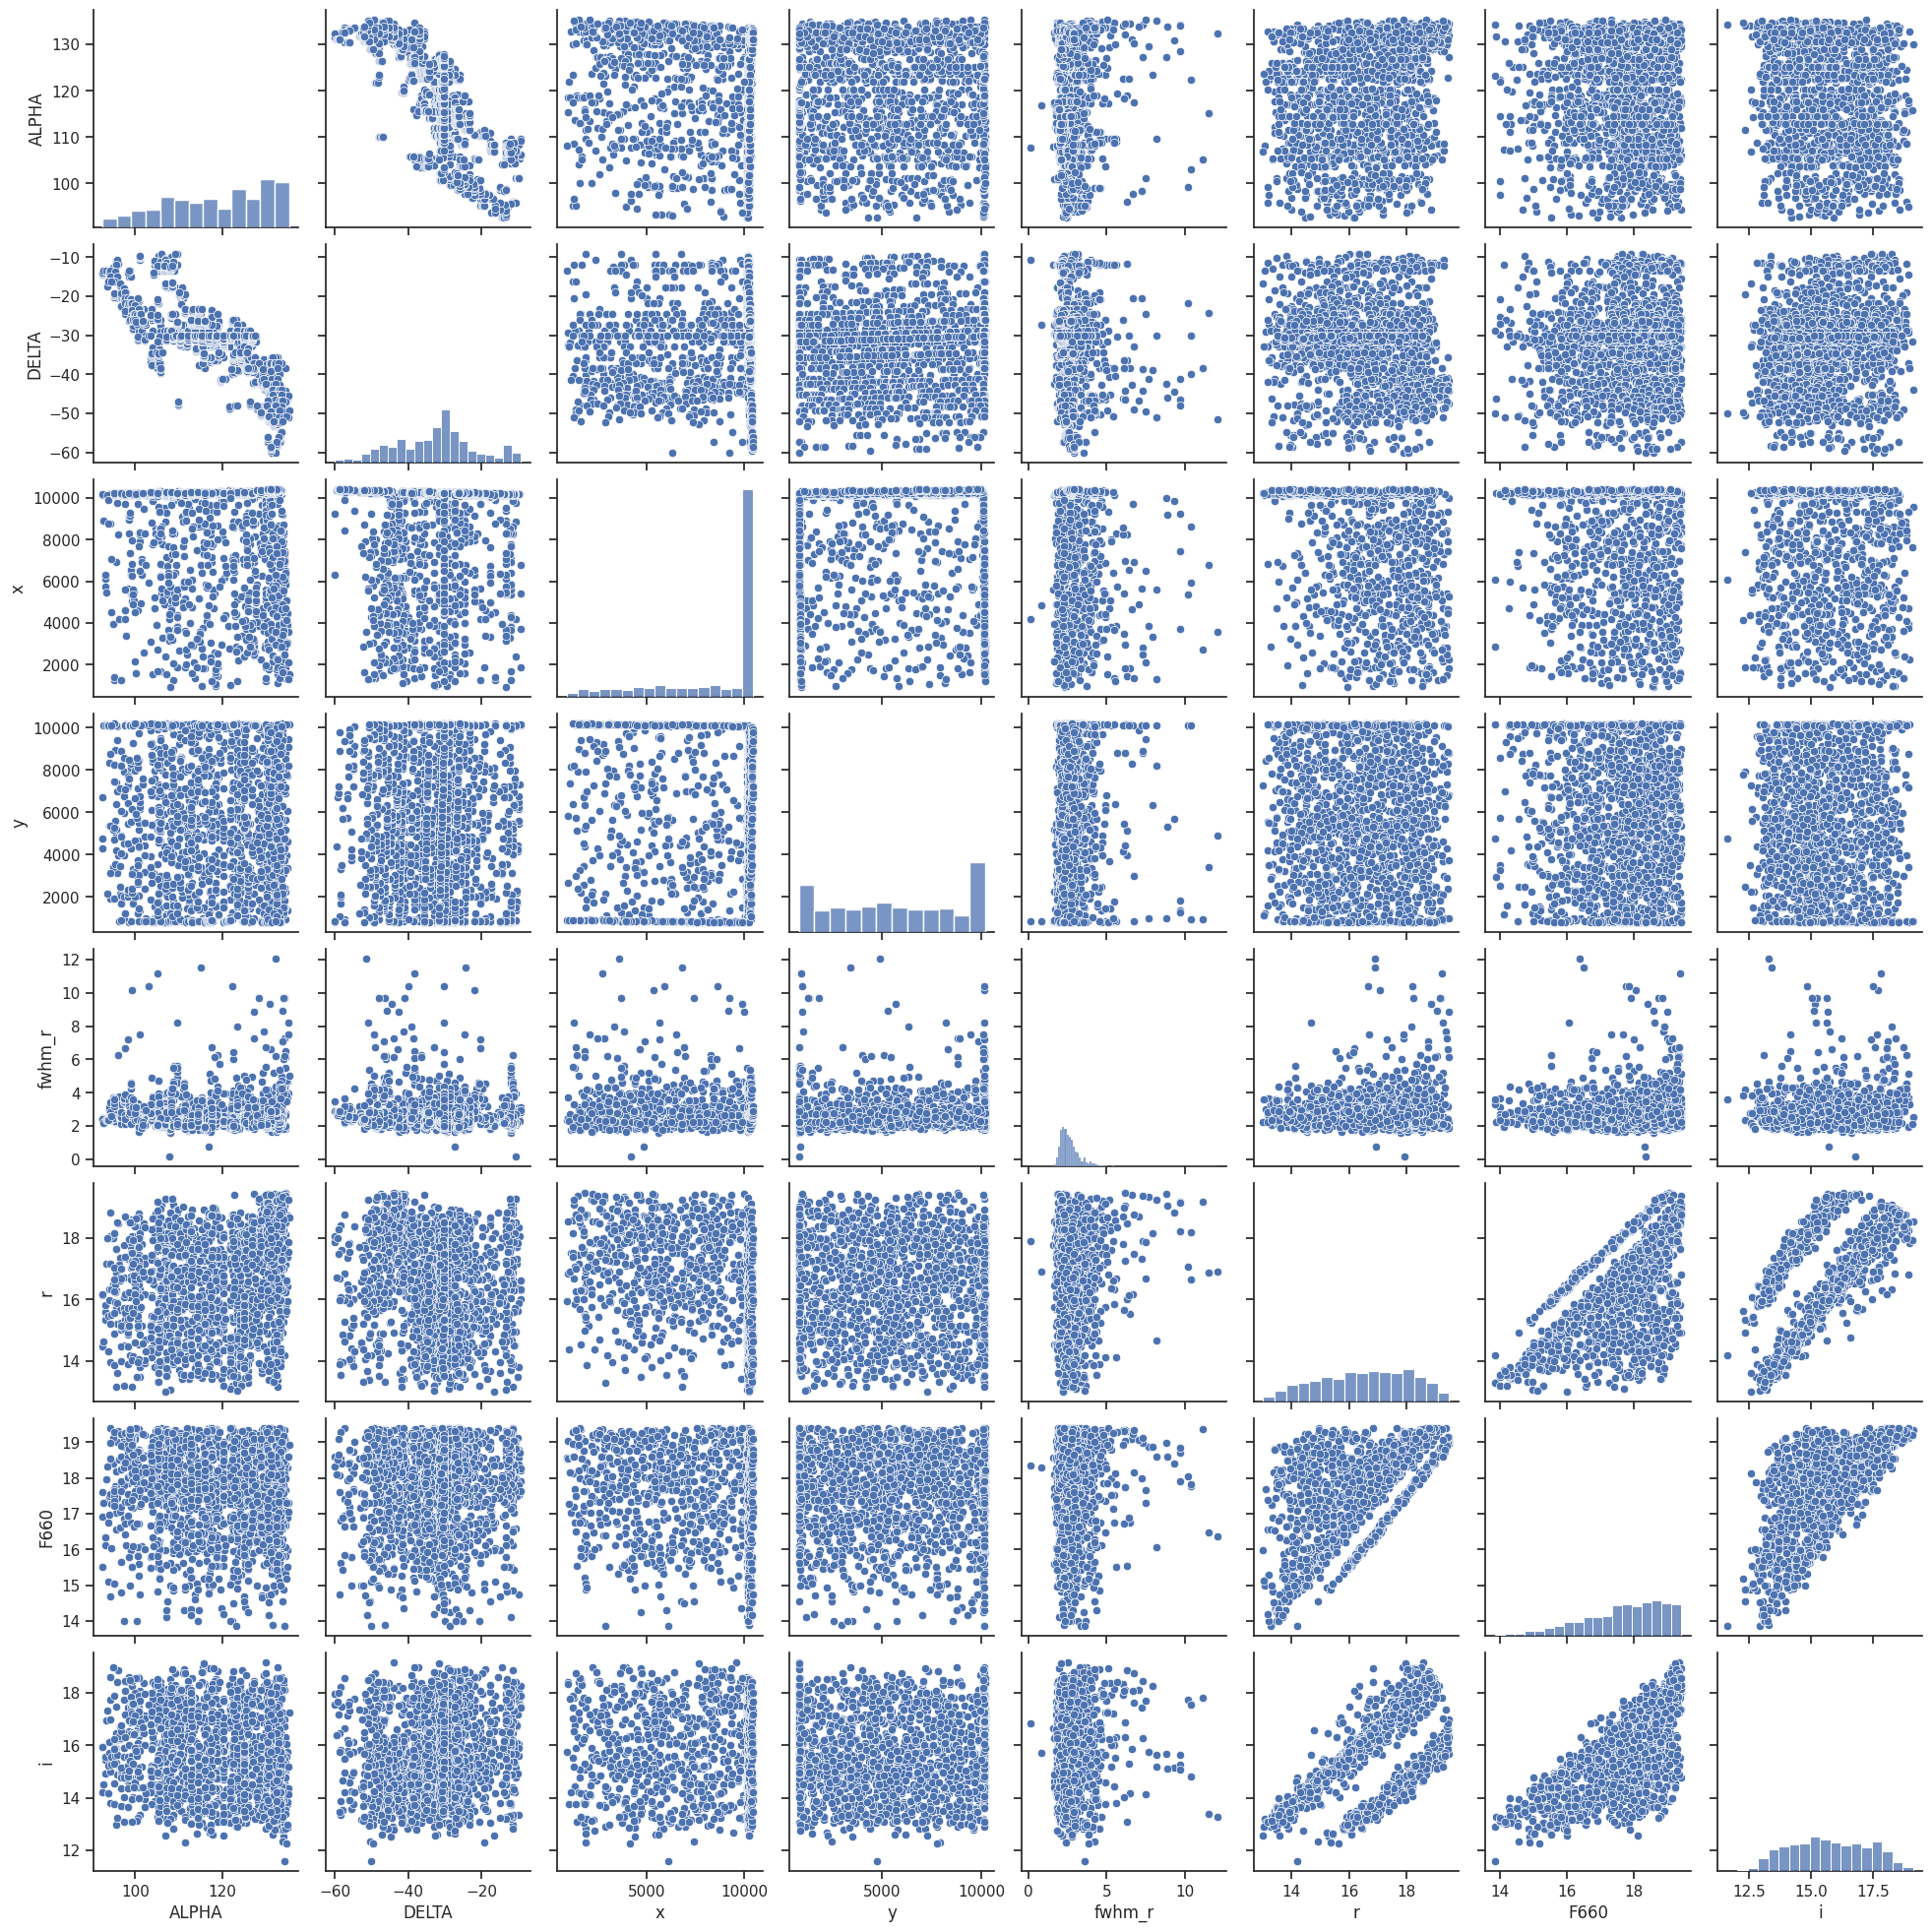

In [20]:
df_bellow = tab_clean_below.to_pandas()
#Select columns 
df_bellow_ = df_bellow[["ALPHA", "DELTA", "x", "y", "fwhm_r", "r", "F660", "i"]]
             
sns.pairplot(df_bellow_)

In [21]:
xx_values = np.linspace(100000, 10, 11000) 
yy = equation(444, -4510000, xx_values)
yyy = equation(-0.01, 10100, xx_values)
yyyy = equation(-0.013, 1050, xx_values)

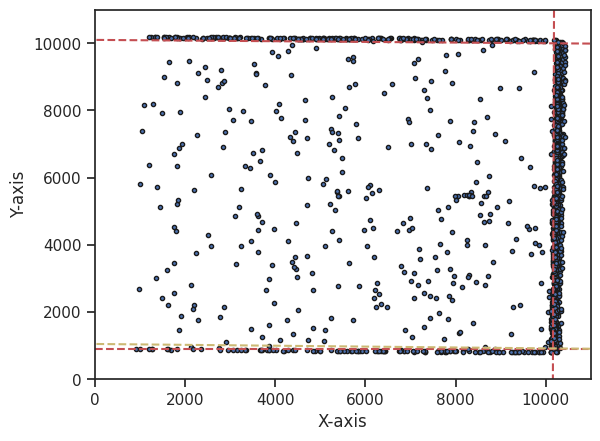

In [22]:
# Dropped the border
# Create a plot
plt.scatter(df_bellow["x"], df_bellow['y'], marker=".", edgecolors="k")
# Add horizontal line at y=0
#plt.axhline(y=10000, color='r', linestyle='--')
plt.axhline(y=900, color='r', linestyle='--')
plt.plot(xx_values, yyy, color='r',linestyle='--')
# Add vertical line at x=0
#plt.axvline(x=10000, color='g', linestyle='--')
plt.plot(xx_values, yy, color='r',linestyle='--')
plt.plot(xx_values, yyyy, color='y',linestyle='--')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0, 11000)
plt.ylim(0, 11000)
# Show the plot
plt.show()

### Upper

In [23]:
tab_clean_upper = tab_clean[color_crit_upper]
tab_clean_upper

<Table length=1358>
NUMBER       ALPHA               DELTA            u         uerr        g         gerr        r         rerr    ...  ellog_r    ellip_r    class_r      spread_r    flux_radius_r area_r  mumax_r  kron_radius_r
int32       float64             float64        float64    float64    float64    float64    float64    float64   ...  float64    float64    float64      float64        float64    int16   float64     float64   
------ ------------------ ------------------- --------- ----------- --------- ----------- --------- ----------- ... --------- ----------- ---------- -------------- ------------- ------ --------- -------------
 21581 102.00115409658773 -10.364111021632276      99.0        99.0 20.492277  0.22686848 19.405464 0.064667895 ... 1.0487227  0.04645914 0.92322046  -0.0026315725      1.276113     17 20.551216           3.5
 44062 101.99219195429943  -10.10488901009143      99.0        99.0 20.043163  0.15941684 19.301996  0.06106034 ... 1.1483302  0.12917036  0.8490674 -0.00046100173     1.6925797     16 20.619907           3.5
 59758 101.23517746266423  -9.924439770243934 20.504908  0.31328306 19.478508  0.09604143 18.745905  0.03921416 ... 1.2238781  0.18292516 0.68532413    0.004748705     1.7002867     29  20.16497           3.5
 84642  101.2959788558612  -9.640380612123073 20.237062  0.25280875  19.79664  0.12866044 18.817825 0.042472944 ... 1.0874199    0.080392 0.79697484 -0.00042917483     1.7051942     24 20.108475           3.5
114386 101.64579915622147  -9.283852888813914      99.0        99.0 20.780264   0.3149217 19.388054  0.06893423 ... 1.0078969 0.007834971  0.9112804  -0.0011820929     1.4155424     17 20.635006           3.5
   319 106.51409588369934 -10.609298085472714      99.0        99.0  19.53119 0.055329733 18.729197 0.022075213 ...  1.063834  0.06000364  0.9995653  -0.0056924657     1.4096997     22 18.960726           3.5
  8710 106.20078538995793  -10.50525599557571 19.037668  0.04326471 19.354897  0.04579749 18.230957 0.014983625 ... 1.1028692  0.09327412  0.9660518  3.6499663e-05     1.2563368     28 19.002687           3.5
 20490 106.44059137454653 -10.351077304585042 18.747587 0.034336593 17.475414 0.011068122 16.345085 0.004710775 ... 1.0923421   0.0845359 0.97584915   0.0072260494     1.4078493    110 17.288618           3.5
   ...                ...                 ...       ...         ...       ...         ...       ...         ... ...       ...         ...        ...            ...           ...    ...       ...           ...
121990  132.6483924848858  -57.65908867281079      99.0        99.0 19.660023  0.16033989 18.570097 0.034828693 ...  1.122648  0.10924882 0.96702534  0.00053338206     1.6708249     26 19.999245           3.5
130618 135.25534078744485 -57.588369074500214      99.0        99.0      99.0        99.0  18.06032 0.022562392 ... 1.2237008  0.18280679  0.9681457   -0.008913657     1.2438831     27 18.845411           3.5
134639 135.13913515665402 -57.556730271400944      99.0        99.0 19.627352  0.15441345  19.08559 0.054158963 ... 1.1842592  0.15559024  0.8960841    -0.00042383     1.3339609     15 20.475687           3.5
156931 134.27001895965708  -57.37775948995089 18.854948  0.07683038  17.26779 0.020813735 16.775982 0.008440872 ...  1.201868   0.1679619 0.98180586  -0.0005070019     1.7239665     59 18.341309           3.5
 78393 132.29413345794626 -59.293429759812135 20.962238  0.34336743 19.819262  0.11320245 19.379944  0.05020653 ... 1.1002295 0.091098666 0.90458024   -0.000515059     1.5106779     17 20.770721           3.5
 96621 132.33361650306014 -59.126499134245826      99.0        99.0 20.107988  0.14784034 19.414715 0.051760275 ...  1.124842  0.11098629  0.9489918 -0.00045335438     1.5823218     19 20.812128      3.942521
146409 131.19398645534037 -58.680781675334536 20.099586   0.1482762 19.306265  0.07337162 18.763618  0.03029496 ... 1.0921257  0.08435446  0.9749154  -0.0008513332      1.520597     26 20.090513           3.5
147773  1

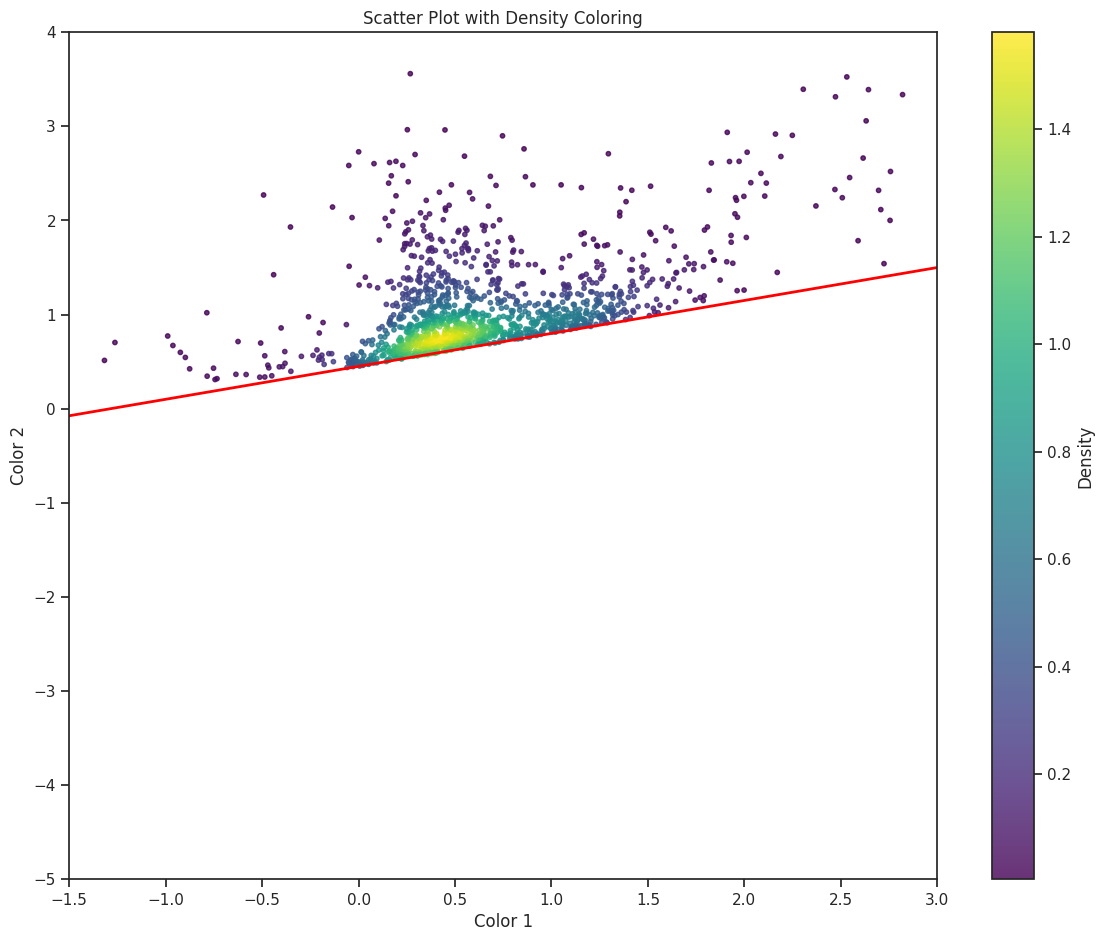

In [24]:
ri_upper = tab_clean_upper["r"] - tab_clean_upper["i"]
rj660_upper = tab_clean_upper["r"] - tab_clean_upper["F660"]


plots(ri_upper, rj660_upper, x_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4))

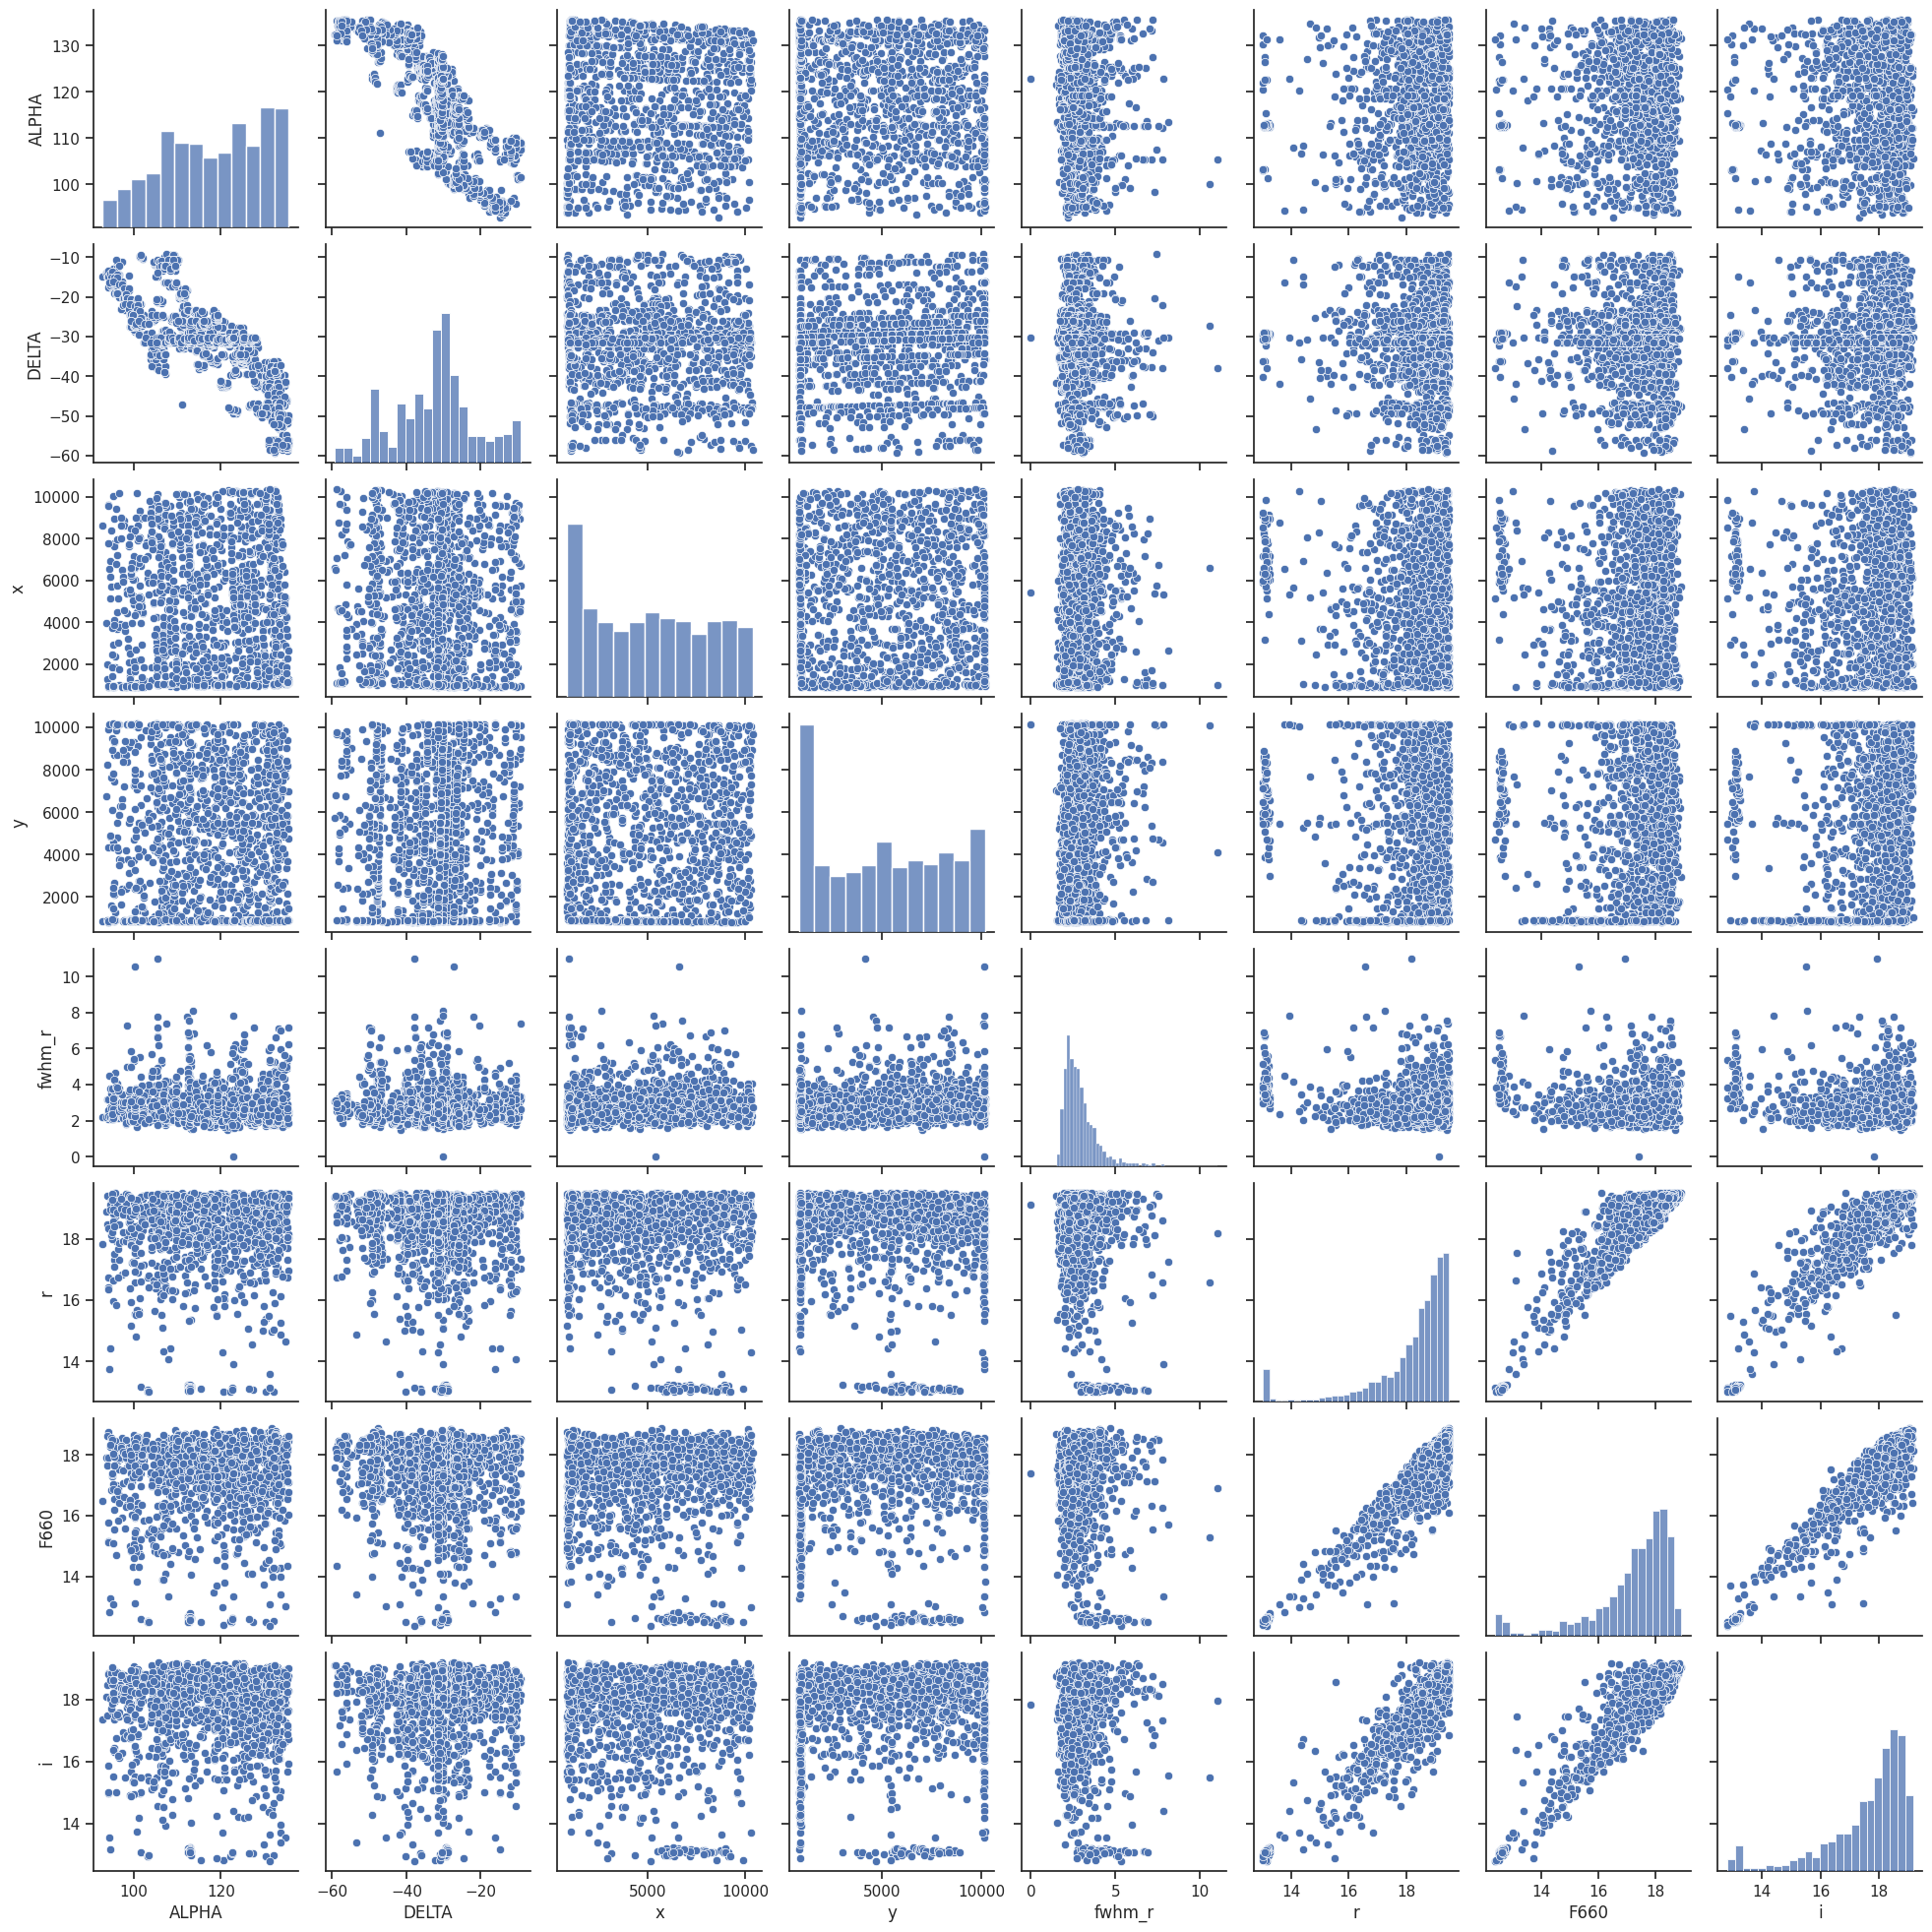

In [25]:
df_upper = tab_clean_upper.to_pandas()
#Select columns 
df_upper_ = df_upper[["ALPHA", "DELTA", "x", "y", "fwhm_r", "r", "F660", "i"]]
             
sns.pairplot(df_upper_)

In [26]:
yyyyy = equation(80, -86000, xx_values)#-4510000

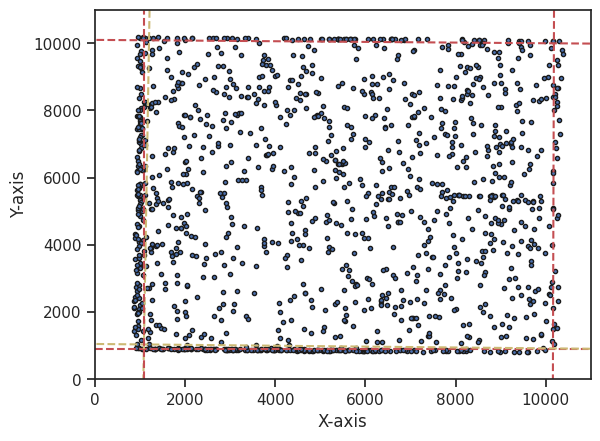

In [27]:
# Dropped the border
# Create a plot
plt.scatter(df_upper["x"], df_upper['y'], marker=".", edgecolors="k")
# Add horizontal line at y=0
#plt.axhline(y=10000, color='r', linestyle='--')
plt.axhline(y=900, color='r', linestyle='--')
plt.plot(xx_values, yyy, color='r',linestyle='--')
# Add vertical line at x=0
#plt.axvline(x=10000, color='g', linestyle='--')
plt.plot(xx_values, yy, color='r',linestyle='--')
plt.plot(xx_values, yyyyy, color='y',linestyle='--')
plt.plot(xx_values, yyyy, color='y',linestyle='--')
plt.axvline(x=1090, color='r', linestyle='--')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0, 11000)
plt.ylim(0, 11000)
# Show the plot
plt.show()

In [28]:
# Now dropping the borders
#yy = equation(444, -4510000, xx_values)
#yyy = equation(-0.01, 10100, xx_values)
border_crit = (tab_clean["y"]  >= 444*tab_clean["x"] - 4510000) & \
               (tab_clean["y"]  <= -0.01*tab_clean["x"] + 10100) & \
            (tab_clean["y"] <= 80*tab_clean["x"] - 86000) &  (tab_clean["y"] >= -0.013*tab_clean["x"] + 1050)

In [29]:
tab_clean_border = tab_clean[border_crit]
tab_clean_border

<Table length=7007778>
NUMBER       ALPHA               DELTA            u         uerr        g         gerr        r         rerr     ...  ellog_r    ellip_r    class_r      spread_r    flux_radius_r area_r  mumax_r  kron_radius_r
int32       float64             float64        float64    float64    float64    float64    float64    float64    ...  float64    float64    float64      float64        float64    int16   float64     float64   
------ ------------------ ------------------- --------- ----------- --------- ----------- --------- ------------ ... --------- ----------- ---------- -------------- ------------- ------ --------- -------------
   599 101.43582213090102  -10.59673759653088 17.176365 0.019910358 14.526973 0.003376932  13.36191 0.0016044598 ... 1.0187933 0.018446684  0.9888451   0.0017700202      1.491844    304 14.516879           3.5
   684 101.17176519002028 -10.597633682193903 18.597006 0.053539716 16.463434 0.010051523 15.660203  0.005125429 ... 1.0512085 0.048713923  0.9835912  0.00096252374     1.4893821     98 16.661211           3.5
   754 101.29916156734336 -10.598226813125626 17.410475   0.0229127 15.626206 0.006050197 14.879412 0.0033805454 ... 1.1948053   0.1630435 0.98225296    0.005383578     1.7981781    164 15.973552           3.5
   821 101.24903100289009 -10.598762196030632 19.556387    0.118797 16.868412 0.012956759 15.667176   0.00515059 ... 1.0466887  0.04460603  0.9860184   0.0013504357     1.4884717    106 16.870226           3.5
   822 101.13339545121777 -10.599687842202238  20.11818  0.19032635 18.317417 0.036244668  17.54607  0.015660914 ... 1.0319777 0.030986786 0.98229456 -0.00020005846     1.4241942     42 18.532196           3.5
   861  101.1568678605124 -10.599800430651621      99.0        99.0  19.11152  0.06901908 17.938047  0.020363113 ... 1.0322789  0.03126955  0.9813185    0.001129458     1.4797713     39 19.090977           3.5
   923 101.11743567315538 -10.599683148014083      99.0        99.0  20.09718  0.16120176 19.182947   0.05165446 ... 1.0573128 0.054206192 0.92847526  -0.0027616953     1.3154424     15 20.250828           3.5
   936 101.13851871988172 -10.598865125097085 19.910011  0.15836675 17.979404 0.028035194 17.160763  0.012203799 ... 1.0845864  0.07798952  0.9829871  0.00084141846      1.479997     50 18.208174           3.5
   ...                ...                 ...       ...         ...       ...         ...       ...          ... ...       ...         ...        ...            ...           ...    ...       ...           ...
154202 133.77478900619136  -58.63341552771152 20.300983  0.17696644  18.88126  0.04928596 18.148266  0.018739004 ... 1.0910027  0.08341199 0.98150265  -0.0009226093     1.6987203     39   19.5748           3.5
154207 131.41661925927176  -58.65174809377939 19.274117  0.07246043 17.136738 0.011983902 16.317144 0.0051365616 ...  1.039943 0.038408875  0.9869119 -8.9874935e-05     1.6440543     84 17.685196           3.5
154214 131.76055588535746  -58.67178342765507      99.0        99.0 20.041819  0.14005944 19.190601  0.043627895 ... 1.0605439  0.05708754 0.94155157  -0.0012028569     1.4752662     21 20.445192           3.5
154221 133.28021718646767  -58.63125910365725      99.0        99.0  20.56387  0.23095371 19.389965  0.052419342 ... 1.0641513  0.06028402  0.5945047   0.0015202739      1.483324     20 20.928373           3.5
154224  133.1811790685612 -58.680841156452956 20.869568   0.3055923 19.780874   0.1100665 18.829443   0.03233932 ... 1.1361729 0.119852304  0.9185118  0.00092918146     1.6282876     29 20.307621           3.5
154225  132.5514264280212   -58.6803192843011 20.671007  0.25750637 19.605003  0.09347016 19.059345   0.03889356 ... 1.0495205  0.04718399  0.9403246   0.0011704119     1.6602832     25  20.44012           3.5
154230 133.88788552302333  -58.67729991483857      99.0        99.0 19.738342  0.10506029 18.874659  0.033874873 ... 1.0588628  0.05559063  0.7758389    0.000533249     1.6436368     29 20.255592  

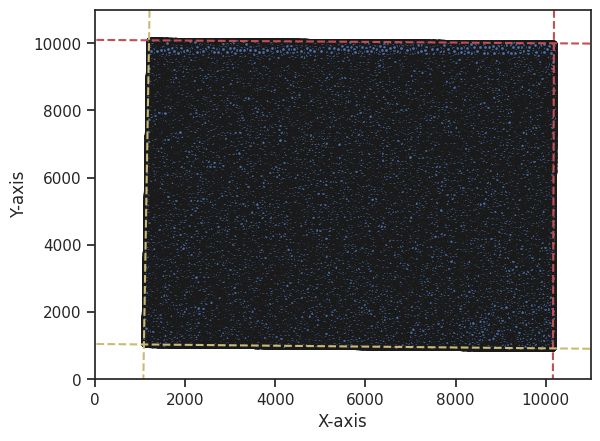

In [30]:
# Dropped the border
# Create a plot
plt.scatter(tab_clean_border["x"], tab_clean_border['y'], marker=".", edgecolors="k")
# Add horizontal line at y=0
#plt.axhline(y=10000, color='r', linestyle='--')
plt.plot(xx_values, yyy, color='r',linestyle='--')
# Add vertical line at x=0
#plt.axvline(x=10000, color='g', linestyle='--')
plt.plot(xx_values, yy, color='r',linestyle='--')
plt.plot(xx_values, yyyyy, color='y',linestyle='--')
plt.plot(xx_values, yyyy, color='y',linestyle='--')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0, 11000)
plt.ylim(0, 11000)
# Show the plot
plt.show()

# Spliting by r bin

In [31]:
# Define conditions for splitting the table based on the "r" column
condition_1 = tab_clean_border['r'] <= 16
condition_2 = (tab_clean_border['r'] > 16) & (tab_clean_border['r'] <= 17.5)
condition_3 = (tab_clean_border['r'] > 17.5) & (tab_clean_border['r'] <= 18.5)
condition_4 = (tab_clean_border['r'] > 18.5) & (tab_clean_border['r'] <= 19.5)

# Apply conditions to filter the table
table_1 = tab_clean_border[condition_1]
table_2 = tab_clean_border[condition_2]
table_3 = tab_clean_border[condition_3]
table_4 = tab_clean_border[condition_4]

In [32]:
len(table_1)

904012

In [33]:
# Convert Astropy tables to pandas DataFrames and save each one
df_table_1 = table_1.to_pandas()
df_table_1.to_csv('../Disk_Lomeli/disk_splus_13r16.csv', index=False)
del df_table_1  # Free memory by deleting the DataFrame

In [34]:
df_table_2 = table_2.to_pandas()
df_table_2.to_csv('../Disk_Lomeli/disk_splus_16r175.csv', index=False)
del df_table_2

In [35]:
df_table_3 = table_3.to_pandas()
df_table_3.to_csv('../Disk_Lomeli/disk_splus_175r185.csv', index=False)
del df_table_3

In [36]:
df_table_4 = table_4.to_pandas()
df_table_4.to_csv('../Disk_Lomeli/disk_splus_185r195.csv', index=False)
del df_table_4

In [37]:
print("CSV files for each table saved successfully.")

CSV files for each table saved successfully.
